In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(0, (105.30682159671441, 102.5922067514775, 113.01853150355603, 0.0), 5260.0, 50)
(1, (61.3646517739816, 27.089947437582126, 52.45476346911958, 0.0), 54292.0, 50)
(2, (66.09680923285812, 22.772708757637474, 45.10169721656484, 0.0), 3310.5, 50)
(3, (51.1383937128618, 16.841192256085872, 35.5709219858156, 0.0), 16009.5, 50)
(4, (68.89931844627915, 40.057738128220755, 66.99822685210839, 0.0), 22333.0, 50)
(5, (55.85202436402722, 13.824077391615907, 46.008688642063774, 0.0), 8134.0, 50)
(6, (43.54310572106512, 20.86747517356534, 44.79506107742332, 0.0), 8457.0, 50)
(7, (47.27577028552992, 11.867801258267463, 39.35884820132279, 0.0), 14265.0, 50)
(8, (57.05600574417889, 19.514001436044722, 41.339727151502714, 0.0), 5407.0, 50)
(9, (58.1051641450942, 20.231578389549828, 44.28608144988209, 0.0), 63601.5, 50)
(10, (39.68313342672037, 20.85829977236911, 54.014402031167926, 0.0), 98684.5, 50)
(11, (62.10602266736954, 13.257577754348972, 42.500527148128626, 0.0), 11612.5, 50)
(12, (56.03900137370

True

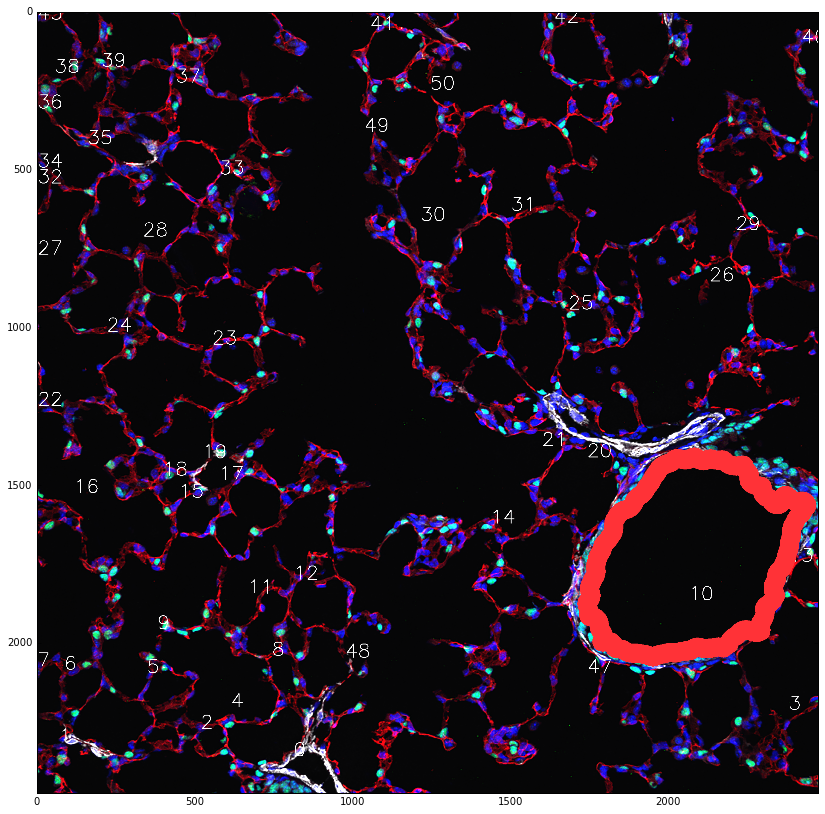

In [201]:
###Improved algorithm
##Identifying Bronchioles from Veins with Red thick lines
filename=str("C:/Users/PABLO ORTIZ/MMP28.tif")
orim=cv2.imread(filename)

im = orim
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

for i in range(0,3):
    im = cv2.GaussianBlur(im, (33,33),0)

orim = cv2.cvtColor(orim, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)



# find contours
finalcontours = []
thresh = cv2.inRange(im, np.array([0,0,0]), np.array([25,25,25]))
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(0, len(contours)):
    a = cv2.contourArea(contours[i])
    if (a>3000 and a<10000000):
        finalcontours.append(contours[i])

im=orim
orim=cv2.imread(filename)
orim = cv2.cvtColor(orim, cv2.COLOR_BGR2RGB)

for ia in range(0, len(finalcontours)):
        a = cv2.contourArea(finalcontours[ia])
        if a>375000:
            T=75
        elif a>200000:
            T= int(a*0.0002)
        else:
            T=50
        mask = np.zeros(imgray.shape,np.uint8)
        temp2 = cv2.drawContours(mask,finalcontours,ia,(100,100,100),thickness=T, lineType=2,maxLevel = 0)

        cnt=finalcontours[ia]
        cv2.drawContours(mask,[cnt],0,0,-1)#delete the contour area from the mask

        mean_val = cv2.mean(orim,mask = mask)
       

        x,y,w,h = cv2.boundingRect(cnt)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(im,str(ia),(x,y), font, 2,(255,255,255),2)

        if mean_val[0]>10 and mean_val[1]>30 and mean_val[2]>30 and mean_val[0]<50:
            temp2 = cv2.drawContours(im,finalcontours,ia,(255,50,55),thickness=T, lineType=1,maxLevel=0)

        print(ia, mean_val, a, T)

plt.figure(figsize=(48, 14))
plt.imshow(im)
plt.figure(figsize=(48, 14))
orim=cv2.imread(filename)
orim = cv2.cvtColor(orim, cv2.COLOR_BGR2RGB)
#plt.imshow(orim)
im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
cv2.imwrite("Segmented" + filename.split("/")[-1],im)

In [87]:
len(finalcontours)

45

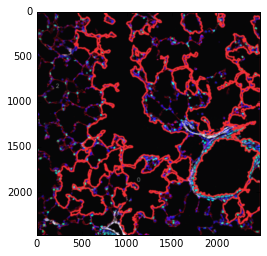

In [20]:
tmp = cv2.GaussianBlur(im, (33,33),0)
plt.imshow(tmp)

In [161]:
filename.split("/")[-1]

'MMP28.tif'

In [177]:
a

2260478.5

In [178]:
a*0.0002

452.0957

In [179]:
a>2550000

False

In [180]:
a>200000

True